In [306]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [307]:
#loading data
data = pd.read_csv(r"C:\Users\User\Desktop\Ezra - My docs\Analysis\DataVisualization\Covid-19 EDA\WHO-COVID-19-global-data.csv")

In [308]:
#parsing Data_resported to datatime
data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293406 entries, 0 to 293405
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      293406 non-null  datetime64[ns]
 1   Country_code       292168 non-null  object        
 2   Country            293406 non-null  object        
 3   WHO_region         293406 non-null  object        
 4   New_cases          293406 non-null  int64         
 5   Cumulative_cases   293406 non-null  int64         
 6   New_deaths         293406 non-null  int64         
 7   Cumulative_deaths  293406 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 17.9+ MB


In [310]:
#multiindexing
data.set_index(['Date_reported', 'Country'], inplace = True)

In [313]:
#indexing the top 20 countries by Cumulative deaths
cumulative_deaths = data.loc[('2023-05-24'), 'Cumulative_deaths']
cumulative_deaths = cumulative_deaths.to_frame()
top20 = cumulative_deaths.sort_values(by = 'Cumulative_deaths', ascending = False)[:20]
top20

,Cumulative_deaths
Country,
United States of America,1127152
Brazil,702421
India,531843
Russian Federation,398919
Mexico,334079
The United Kingdom,225852
Peru,220561
Italy,190242
Germany,174032


In [316]:
top20 = cumulative_deaths.sort_values(by = 'Cumulative_deaths', ascending = False)[:20]
top20.head()

,Cumulative_deaths
Country,
United States of America,1127152
Brazil,702421
India,531843
Russian Federation,398919
Mexico,334079


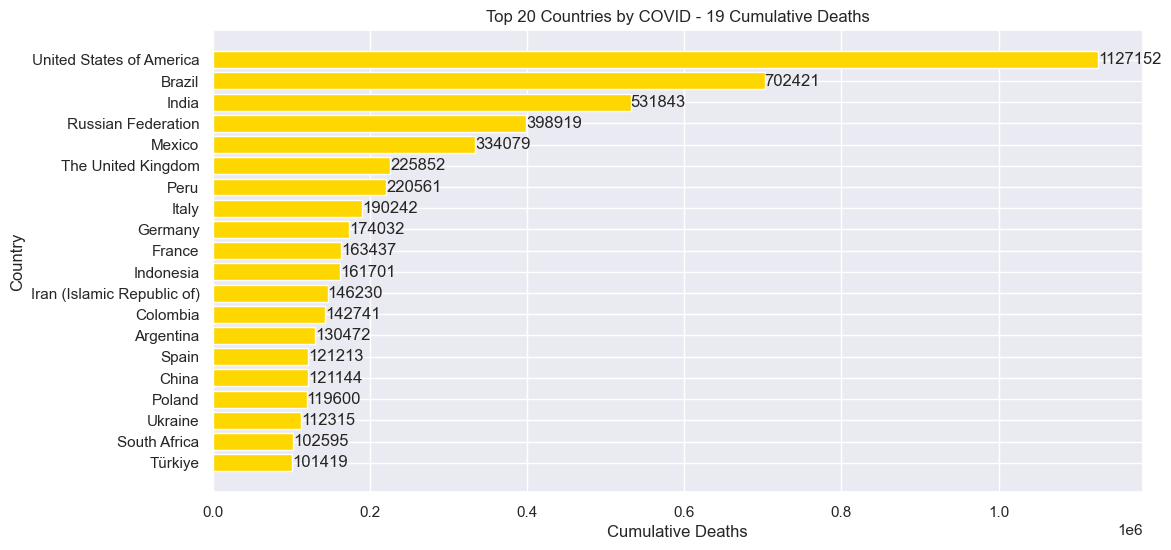

In [331]:
plt.figure(figsize = (12,6))
bars = plt.barh(top20.index, 
         top20['Cumulative_deaths'], color = 'gold')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{width:.0f}',  ha='left', va='center')
    
plt.title('Top 20 Countries by COVID - 19 Cumulative Deaths')
plt.xlabel('Cumulative Deaths')
plt.ylabel('Country')
plt.show()

In [57]:
#Getting the cumuliative deaths in Kenya and Uganda
print('Kenya:', data.loc[('2023-05-24', 'Kenya'), 'Cumulative_deaths'])
print('Uganda:', data.loc[('2023-05-24', 'Kenya'), 'Cumulative_deaths'])

Kenya: 5688
Uganda: 5688


In [314]:
#Getting a list of all the countries
list(data.index.get_level_values(1).unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Côte d’Ivoire',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',

In [315]:
#Getting the Cumulative cases and deaths for day 1 and the last day(according to the data)
data.loc[(['2020-01-03', '2023-05-24'], ['Kenya', 'United States of America']), :]

Country_code WHO_region  New_cases   
Date_reported Country                                                       
2020-01-03    Kenya                              KE       AFRO          0  \
              United States of America           US       AMRO          0   
2023-05-24    Kenya                              KE       AFRO          0   
              United States of America           US       AMRO          0   

                                        Cumulative_cases  New_deaths   
Date_reported Country                                                  
2020-01-03    Kenya                                    0           0  \
              United States of America                 0           0   
2023-05-24    Kenya                               343074           0   
              United States of America         103436829           0   

                                        Cumulative_deaths  
Date_reported Country                                      
2020-01-03    Kenya                                     0  
              United States of America                  0  
2023-05-24    Kenya                                  5688  
              United States of America            1127152

In [332]:
#Adding WHO regions as an index
data2 = data.set_index('WHO_region', append = True)

In [333]:
#Indexing USA Cumulative cases and death
data.loc[('2023-05-24', 'United States of America'), ('Cumulative_cases', 'Cumulative_deaths')]

Cumulative_cases     103436829
Cumulative_deaths      1127152
Name: (2023-05-24 00:00:00, United States of America), dtype: int64

In [334]:
#Cumulative cases and deaths for EAfrican countries for each year
data.loc[(['2020-12-31', '2021-12-31', '2022-12-31', '2023-05-24'], ['Kenya', 'Uganda', 'United Republic of Tanzania']), 
         ('Cumulative_cases', 'Cumulative_deaths')]

Cumulative_cases  Cumulative_deaths
Date_reported Country                                                         
2020-12-31    Kenya                                   96251               1667
              Uganda                                  35220                304
              United Republic of Tanzania               509                 21
2021-12-31    Kenya                                  292237               5376
              Uganda                                 142671               3297
              United Republic of Tanzania             29306                737
2022-12-31    Kenya                                  342470               5688
              Uganda                                 169890               3630
              United Republic of Tanzania             42396                845
2023-05-24    Kenya                                  343074               5688
              Uganda                                 170775               3632
              United Republic of Tanzania             43078                846

In [201]:
regions = data.groupby('WHO_region')[['Cumulative_cases', 'Cumulative_deaths']].max()

In [202]:
regions = regions.sort_values(by = 'Cumulative_deaths', ascending = False)

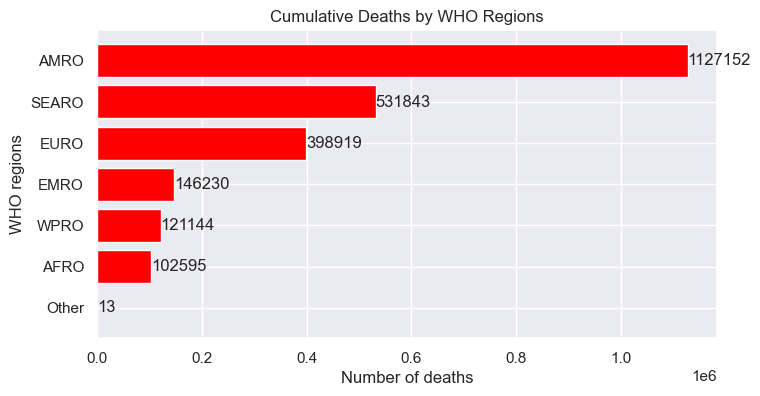

In [203]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(regions.index, regions.Cumulative_deaths, color = 'red')

plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='left', va='center')
    
plt.title('Cumulative Deaths by WHO Regions')
plt.ylabel('WHO regions')
plt.xlabel('Number of deaths')
plt.show()

In [187]:
data

,,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,Country,,,,,,
2020-01-03,Afghanistan,AF,EMRO,0,0,0,0
2020-01-04,Afghanistan,AF,EMRO,0,0,0,0
2020-01-05,Afghanistan,AF,EMRO,0,0,0,0
2020-01-06,Afghanistan,AF,EMRO,0,0,0,0
2020-01-07,Afghanistan,AF,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2023-05-20,Zimbabwe,ZW,AFRO,0,264848,0,5690
2023-05-21,Zimbabwe,ZW,AFRO,0,264848,0,5690
2023-05-22,Zimbabwe,ZW,AFRO,0,264848,0,5690


In [335]:
#Getting the Kenyan data
kenya = data.loc[(slice(None), 'Kenya'), 'Cumulative_deaths']
kenya = kenya.to_frame().droplevel(1)
kenya

,Cumulative_deaths
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0
...,...
2023-05-20,5688
2023-05-21,5688
2023-05-22,5688


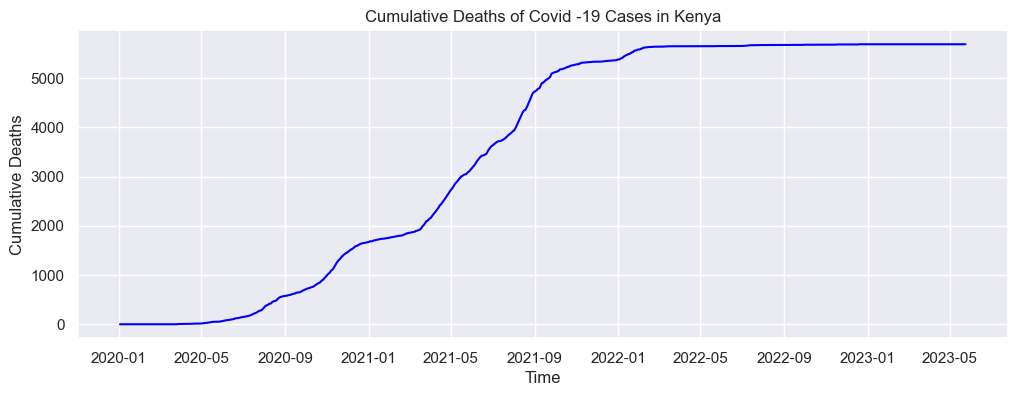

In [336]:
#Plotting the Cumulative Deaths in Kenya
plt.figure(figsize=(12,4))
plt.plot(kenya, color ='blue')
plt.title('Cumulative Deaths of Covid -19 Cases in Kenya')
plt.ylabel('Cumulative Deaths')
plt.xlabel('Time')
plt.show()

In [337]:
#Getting the East African data for Cumulative deaths
ea = data.loc[(slice(None), ['Kenya', 'Uganda', 'United Republic of Tanzania']), 'Cumulative_deaths']
ea = ea.to_frame()
ea.reset_index(['Date_reported', 'Country'], inplace = True)

In [338]:
#Using pivots to reshape data
ea_pivoted = ea.pivot(index= 'Date_reported', columns='Country', values='Cumulative_deaths')
ea_pivoted.head()

Country,Kenya,Uganda,United Republic of Tanzania
Date_reported,,,
2020-01-03,0,0,0
2020-01-04,0,0,0
2020-01-05,0,0,0
2020-01-06,0,0,0
2020-01-07,0,0,0


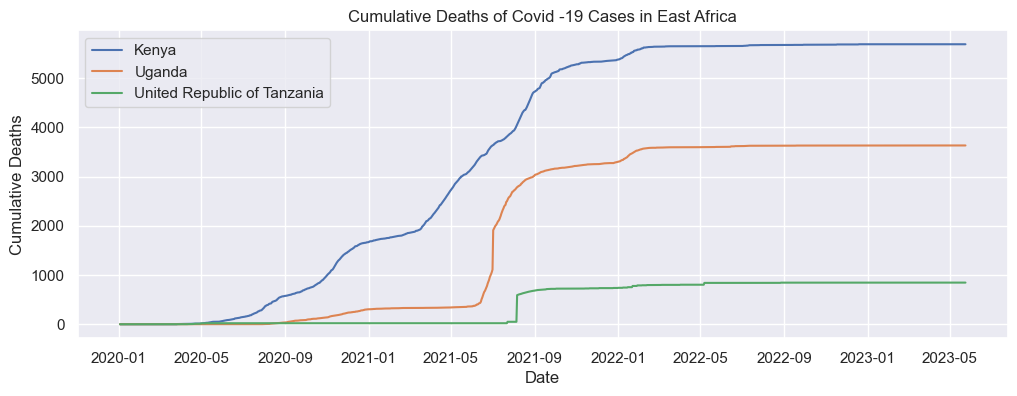

In [339]:
#Plotting cumulative Deaths in East Africa
plt.figure(figsize=(12, 4))
plt.plot(ea_pivoted.index, ea_pivoted['Kenya'], label='Kenya')
plt.plot(ea_pivoted.index, ea_pivoted['Uganda'], label='Uganda')
plt.plot(ea_pivoted.index, ea_pivoted['United Republic of Tanzania'], label='United Republic of Tanzania')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.title('Cumulative Deaths of Covid -19 Cases in East Africa')
plt.legend()
plt.show()

In [340]:
#Reshaping with pivots
ea.pivot(index= 'Date_reported', columns='Country', values='Cumulative_deaths')

Country,Kenya,Uganda,United Republic of Tanzania
Date_reported,,,
2020-01-03,0,0,0
2020-01-04,0,0,0
2020-01-05,0,0,0
2020-01-06,0,0,0
2020-01-07,0,0,0
...,...,...,...
2023-05-20,5688,3632,846
2023-05-21,5688,3632,846
2023-05-22,5688,3632,846


In [341]:
#dropping country as an index
data3 = data.reset_index(level=1, drop=False)

In [342]:
#Creating new columns from the index (Date_reported)
data3['Day'] = data3.index.day
data3['Month'] = data3.index.month
data3['Quarter'] = data3.index.quarter

In [343]:
#The groupby method
data3.loc['2020-01-03': '2020-12-31'].groupby(['Month'])[['Cumulative_deaths']].max()

,Cumulative_deaths
Month,
1,213
2,2838
3,11591
4,60461
5,105325
6,128250
7,156967
8,188798
9,210159


In [345]:
#Importing the Calendar module to rename the months column
import calendar
data3['Month'] = data3['Month'].map(lambda x: calendar.month_name[x])

TypeError: list indices must be integers or slices, not str

<Axes: xlabel='Date_reported'>

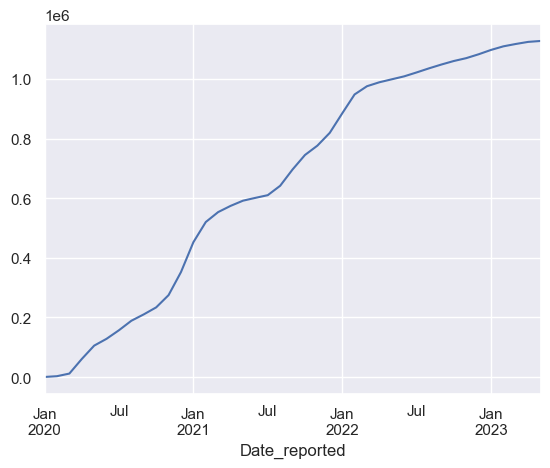

In [295]:
data3['Cumulative_deaths'].resample('M').max().plot()

In [297]:
ea.pivot_table(values='Cumulative_deaths', index='Date_reported', columns='Country')

Country,Kenya,Uganda,United Republic of Tanzania
Date_reported,,,
2020-01-03,0,0,0
2020-01-04,0,0,0
2020-01-05,0,0,0
2020-01-06,0,0,0
2020-01-07,0,0,0
...,...,...,...
2023-05-20,5688,3632,846
2023-05-21,5688,3632,846
2023-05-22,5688,3632,846


In [301]:
data.pivot_table(values = 'Cumulative_deaths', index = 'WHO_region', aggfunc = 'max')

,Cumulative_deaths
WHO_region,
AFRO,102595
AMRO,1127152
EMRO,146230
EURO,398919
Other,13
SEARO,531843
WPRO,121144


In [302]:
data.pivot_table(values = 'Cumulative_deaths', index = 'Country', aggfunc = 'max')

,Cumulative_deaths
Country,
Afghanistan,7913
Albania,3604
Algeria,6881
American Samoa,34
Andorra,159
...,...
Wallis and Futuna,7
Yemen,2159
Zambia,4058


,,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,Country,,,,,,
2020-01-03,Afghanistan,AF,EMRO,0,0,0,0
2020-01-04,Afghanistan,AF,EMRO,0,0,0,0
2020-01-05,Afghanistan,AF,EMRO,0,0,0,0
2020-01-06,Afghanistan,AF,EMRO,0,0,0,0
2020-01-07,Afghanistan,AF,EMRO,0,0,0,0
